In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
lin=LinearRegression()


In [ ]:
df=pd.read_csv("/content/student_exam_data_new.csv")
df.head(5)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [ ]:
import numpy as np
i=np.array(df['Study Hours']).reshape(-1,1)

In [ ]:
lin.fit(i,df['Pass/Fail'])

LinearRegression()

In [ ]:
r=lin.predict([[8]])
print (r)

[0.63131994]


In [ ]:
print("Results based on a study hours")
n=float(input("enter the study hours:"))
r=lin.predict([[n]])


if r>0.5:
  print("Pass")
else:
  print("Fail")

Results based on a study hours
enter the study hours:2
Fail


#LOGICTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
logis = LogisticRegression()
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [ ]:
import numpy as np
i= np.array(df['Study Hours']).reshape(-1,1)
j= np.array(df['Previous Exam Score']).reshape(-1,1)

In [ ]:
logis.fit(j,df['Pass/Fail'])

LogisticRegression()

In [ ]:
r=logis.predict([[n]])

In [ ]:
print("Results Based on Previous Exam Score")
n = float(input("Enter Previous Exam Score:"))
r = logis.predict([[n]])
if r>0.5:
  print("You Will Pass")
else:
  print("Be Concious you will Fail")

Results Based on Previous Exam Score
Enter Previous Exam Score:79
Be Concious you will Fail


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
dt=DecisionTreeClassifier()
df.head(5)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [ ]:
features=df.iloc[:,0:2]

In [ ]:
dt.fit(features,df['Pass/Fail'])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= 5.005\ngini = 0.465\nsamples = 500\nvalue = [316, 184]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(0.6, 0.5, 'x[1] <= 59.357\ngini = 0.448\nsamples = 278\nvalue = [94, 184]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 184\nvalue = [0, 184]')]

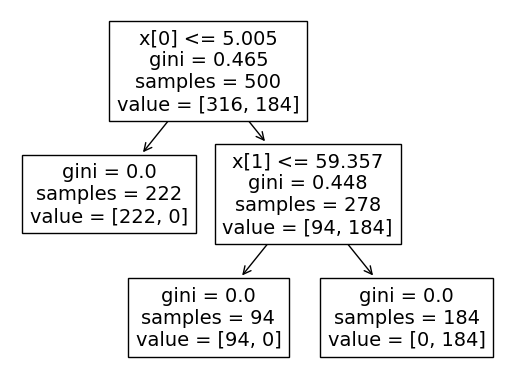

In [ ]:
plot_tree(dt)

In [ ]:
a = float(input("Enter Study Hours:"))
b = float(input("Enter Previous Exam Score:"))
r=dt.predict([[a,b]])
if r>0.5:
  print("You Will Pass")
else:
  print("Be Concious you will Fail")

Enter Study Hours:12
Enter Previous Exam Score:25
Be Concious you will Fail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=20)
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [ ]:
features=df.iloc[:,0:2]
rf.fit(features,df['Pass/Fail'])


RandomForestClassifier(n_estimators=20)

In [ ]:
a = float(input("Enter Study Hours:"))
b = float(input("Enter Previous Exam Score:"))
r=dt.predict([[a,b]])
if r>0.5:
  print("You Will Pass")
else:
  print("Be Concious you will Fail")

Enter Study Hours:2
Enter Previous Exam Score:56
Be Concious you will Fail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import os
output_dir = "tree_visualizations"
os.makedirs(output_dir,exist_ok=True)



In [ ]:
from sklearn.tree import export_graphviz
for i,tree in enumerate(rf.estimators_):
  tree_dot_file=os.path.join(output_dir,f'tree_{i}.dot')
  tree_png_file=os.path.join(output_dir,f'tree_{i}.png')

  export_graphviz(tree, out_file=tree_dot_file, feature_names=["Study Hours", "Previous Exam Score"],
                    class_names=[str(cls) for cls in rf.classes_], filled=True, rounded=True)

  command =f'dot -Tpng {tree_dot_file} -o {tree_png_file}'
  os.system(command)

  print(f'Tree {i} visualization saved to {tree_png_file}')

Tree 0 visualization saved to tree_visualizations/tree_0.png
Tree 1 visualization saved to tree_visualizations/tree_1.png
Tree 2 visualization saved to tree_visualizations/tree_2.png
Tree 3 visualization saved to tree_visualizations/tree_3.png
Tree 4 visualization saved to tree_visualizations/tree_4.png
Tree 5 visualization saved to tree_visualizations/tree_5.png
Tree 6 visualization saved to tree_visualizations/tree_6.png
Tree 7 visualization saved to tree_visualizations/tree_7.png
Tree 8 visualization saved to tree_visualizations/tree_8.png
Tree 9 visualization saved to tree_visualizations/tree_9.png
Tree 10 visualization saved to tree_visualizations/tree_10.png
Tree 11 visualization saved to tree_visualizations/tree_11.png
Tree 12 visualization saved to tree_visualizations/tree_12.png
Tree 13 visualization saved to tree_visualizations/tree_13.png
Tree 14 visualization saved to tree_visualizations/tree_14.png
Tree 15 visualization saved to tree_visualizations/tree_15.png
Tree 16 visu

In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=336989860),
 DecisionTreeClassifier(max_features='sqrt', random_state=1807992687),
 DecisionTreeClassifier(max_features='sqrt', random_state=290757847),
 DecisionTreeClassifier(max_features='sqrt', random_state=386802773),
 DecisionTreeClassifier(max_features='sqrt', random_state=1102848692),
 DecisionTreeClassifier(max_features='sqrt', random_state=1664448377),
 DecisionTreeClassifier(max_features='sqrt', random_state=1749758785),
 DecisionTreeClassifier(max_features='sqrt', random_state=560262181),
 DecisionTreeClassifier(max_features='sqrt', random_state=636991866),
 DecisionTreeClassifier(max_features='sqrt', random_state=236330533),
 DecisionTreeClassifier(max_features='sqrt', random_state=908252337),
 DecisionTreeClassifier(max_features='sqrt', random_state=484640779),
 DecisionTreeClassifier(max_features='sqrt', random_state=146829677),
 DecisionTreeClassifier(max_features='sqrt', random_state=1550710325),
 DecisionTreeCl

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=["Study Hours", "Previous Exam Score"],
  class_names=[str(cls) for cls in rf.classes_], filled=True, rounded=True)

In [ ]:
command =f'dot -Tpng {tree_dot_file} -o {tree_png_file}'
os.system(command)

print(f'Tree {i} visualization saved to {tree_png_file}')


Tree 19 visualization saved to tree_visualizations/tree_19.png
